<h1 style = "font-size:3rem;color:darkcyan"> Artificial Neural Network Implementation </h1>


In [1]:
# import libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors

In [42]:
class MLP:
    
    def __init__(self, input_layer = 3, hidden_layers = [3,], output_layer = 1):
        self.input_layer = input_layer
        self.hidden_layers = hidden_layers
        self.output_layer = output_layer
        
        self.layers = [input_layer] + hidden_layers + [output_layer]
        
        print(f'Layers = {self.layers}')

        self.n_layers = len(self.layers)

        self.weights = []
        for i in range(self.n_layers-1):
            W = np.random.rand(self.layers[i], self.layers[i+1]) # create matrix (# neurons curr layer, # neurons next layer)
            self.weights.append(W)
    
    def _sigmoid(self,h):
        y = 1 / (1 + math.e**(-h))
        return y

    def _activate(self,a, W):
        h = np.dot(a, W)
        y = self._sigmoid(h)
        return y

    def forward_propagate(self, inputs):
        activations = inputs
        # save activations for visualization
        self.a = []
        for i in range(self.n_layers-1):
            self.a.append(activations)
            activations = self._activate(activations, self.weights[i])
        self.a.append(activations) # final layer
        return activations
    
    def visualize_ANN(self, size = [7, 7]):
        fig = plt.figure(figsize = size)
        ax = fig.add_subplot(111)
        
        ax.set_title(f'ANN with {self.n_layers} layers', fontsize = 18)
        ax.set_xlabel('Layer')
        ax.set_ylabel('Neuron')

        ax.set_ylim(-1,np.max(self.layers))
        ax.set_xlim(0,np.max(self.layers) + np.max(self.layers) / self.n_layers)
        
        x_ticks = np.linspace(0, np.max(self.layers), self.n_layers+1)
        x_labels = np.arange(0, self.n_layers+1, 1)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_labels)
        step_size = np.max(self.layers) / self.n_layers
        
        cm = plt.get_cmap('viridis')
        cNorm  = colors.Normalize(vmin=0, vmax=self.n_layers)
        scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
        
        for i in range(self.n_layers):
            # draw neurons
            for j in range(self.layers[i]):
                color = scalarMap.to_rgba(i)
                circle = plt.Circle((i*step_size+step_size, j), 0.2, color=color)
                ax.add_patch(circle)
                ax.text(i*step_size+step_size - 0.1,j + 0.3, format(self.a[i][j], '.2f'), fontsize = 9, color = 'black')
                
                # visualize connections and weights using the alpha value
                if i < self.n_layers-1:
                    activation = self.a[i][j]
                    for k in range(self.layers[i+1]): # number of neurons in next layer
                        ax.plot([i*step_size+step_size, (i+1)*step_size+step_size], [j, k], color = 'black', lw = 2*activation ,alpha=activation/2)
                    
                


In [47]:
# create instance
mlp = MLP(3,[4,6,3], 2)

Layers = [3, 4, 6, 3, 2]


In [48]:
# create input 
inputs = np.random.rand(mlp.input_layer)/1.5
inputs

array([0.66140577, 0.5418805 , 0.39972701])

In [49]:
output = mlp.forward_propagate(inputs)

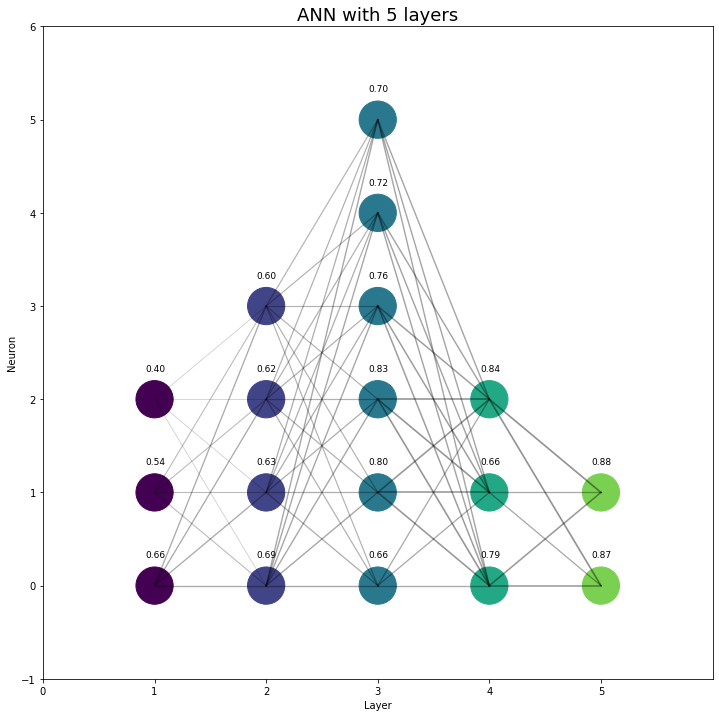

In [50]:
mlp.visualize_ANN(size=[12,12])